In [ ]:
#hypothesis 2: 2.	Higher HbA1c levels are associated with diabetes progression.
#                   •	Patients with HbA1c levels above 6.5% are more likely to develop complications.


In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/Diabetes_DA_project/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
DestinationFolder = "dataset/cleaned"

In [4]:
# Importing the Pandas library
import pandas as pd

# Loading the dataset
df = pd.read_csv(f'{DestinationFolder}/datacleanup2.csv')

# Displaying the first few rows of the dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,AGE
0,Female,61.0,1,1,ever,32.36,5.8,130,0,61
1,Male,44.0,0,0,not current,30.49,3.5,130,0,44
2,Male,23.0,0,0,never,34.55,6.1,90,0,23
3,Male,68.0,1,1,current,27.32,8.8,155,1,68
4,Female,24.0,0,0,former,21.63,6.1,126,0,24


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Correlation between HbA1c and Diabetes:
              HbA1c_level  diabetes
HbA1c_level       1.0000    0.3769
diabetes          0.3769    1.0000


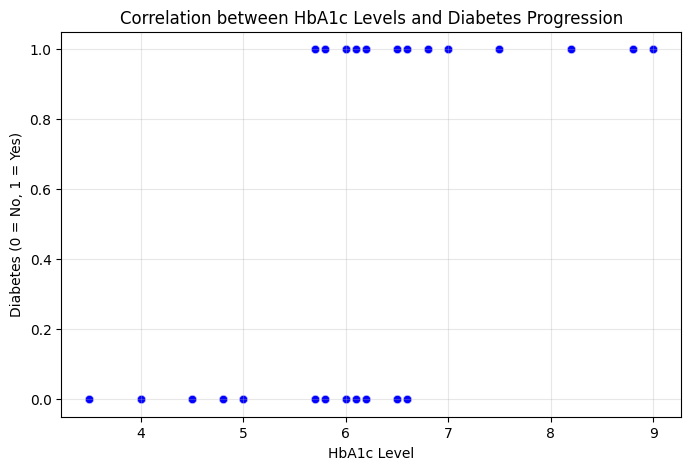

In [8]:
# Check Pearson correlation between HbA1c and diabetes progression
correlation = df[['HbA1c_level', 'diabetes']].corr()
print("Correlation between HbA1c and Diabetes:\n", correlation)

# Seaborn - Scatter plot to visualize the relationship
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["HbA1c_level"], y=df["diabetes"], alpha=0.6, color="blue")
plt.xlabel("HbA1c Level")
plt.ylabel("Diabetes (0 = No, 1 = Yes)")
plt.title("Correlation between HbA1c Levels and Diabetes Progression")
plt.grid(alpha=0.3)
plt.show()

In [12]:
# Categorizing High HbA1c (≥6.5%) vs Normal
df["High_HbA1c"] = df["HbA1c_level"].apply(lambda x: 1 if x >= 6.5 else 0)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,AGE,High_HbA1c
0,Female,61.0,1,1,ever,32.36,5.8,130,0,61,0
1,Male,44.0,0,0,not current,30.49,3.5,130,0,44,0
2,Male,23.0,0,0,never,34.55,6.1,90,0,23,0
3,Male,68.0,1,1,current,27.32,8.8,155,1,68,1
4,Female,24.0,0,0,former,21.63,6.1,126,0,24,0
...,...,...,...,...,...,...,...,...,...,...,...
9806,Male,67.0,0,0,never,35.95,6.5,160,0,67,1
9807,Female,13.0,0,0,never,19.66,3.5,155,0,13,0
9808,Male,14.0,0,0,No Info,18.95,6.0,158,0,14,0
9809,Male,2.0,0,0,No Info,14.66,6.5,160,0,2,1


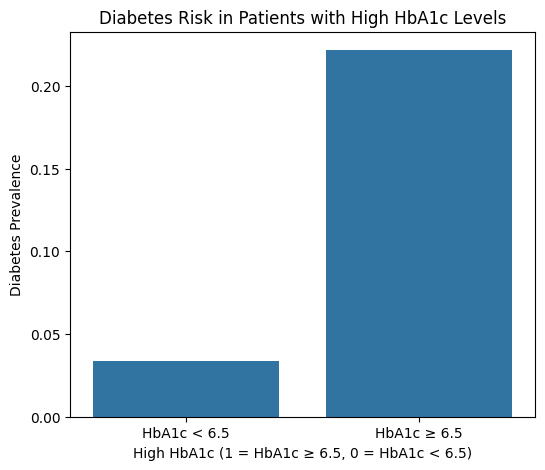

In [11]:
# seaborn - barplot
# Compare prevalence of diabetes in High_HbA1c vs Normal_HbA1c groups
plt.figure(figsize=(6,5))
sns.barplot(x=df["High_HbA1c"], y=df["diabetes"], errorbar=None, legend=False)
plt.xlabel("High HbA1c (1 = HbA1c ≥ 6.5, 0 = HbA1c < 6.5)")
plt.ylabel("Diabetes Prevalence")
plt.title("Diabetes Risk in Patients with High HbA1c Levels")
plt.xticks(ticks=[0,1], labels=["HbA1c < 6.5", "HbA1c ≥ 6.5"])
plt.show()

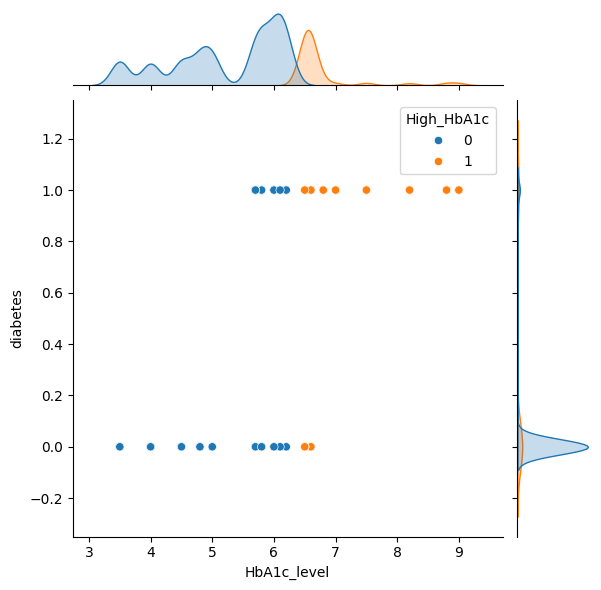

In [21]:
# seaborn - jointplot
sns.jointplot(data=df, y='diabetes', x='HbA1c_level', hue='High_HbA1c')
plt.show()

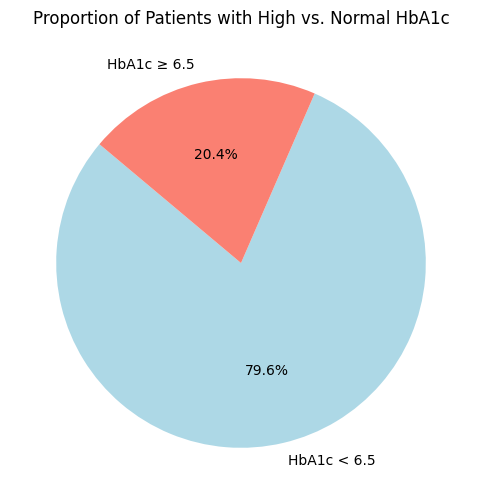

In [20]:
#Matplotlib - piechart: Proportion of Patients with High vs. Normal HbA1c
plt.figure(figsize=(6, 6))
labels = ["HbA1c < 6.5", "HbA1c ≥ 6.5"]
sizes = df["High_HbA1c"].value_counts().sort_index()
colors = ["lightblue", "salmon"]
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Proportion of Patients with High vs. Normal HbA1c")
plt.show()

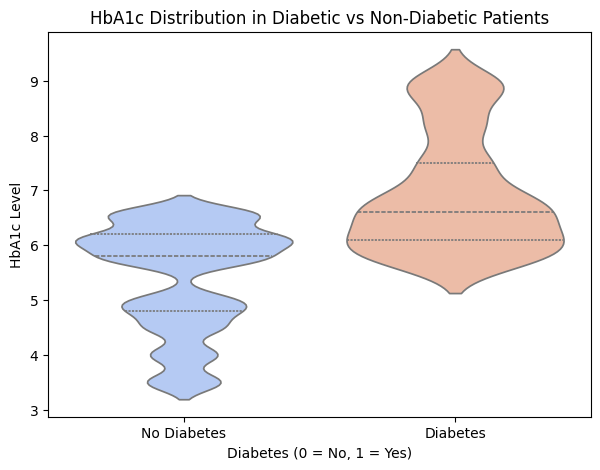

In [17]:
### Matplotlib - Violin Plot: HbA1c Distribution and Complications ###
plt.figure(figsize=(7, 5))
sns.violinplot(x=df["diabetes"], y=df["HbA1c_level"], hue = df["diabetes"], palette="coolwarm", inner="quartile", legend=False)
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("HbA1c Level")
plt.title("HbA1c Distribution in Diabetic vs Non-Diabetic Patients")
plt.xticks(ticks=[0,1], labels=["No Diabetes", "Diabetes"])
plt.show()

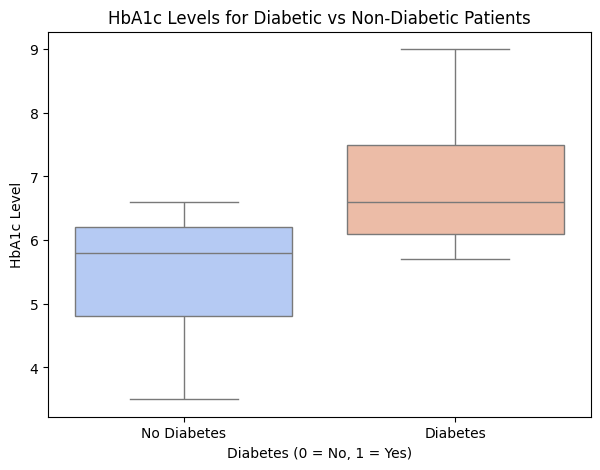

In [19]:
# Matplotlib - Boxplot: HbA1c Levels in Diabetic vs. Non-Diabetic 
plt.figure(figsize=(7, 5))
sns.boxplot(x=df["diabetes"], y=df["HbA1c_level"], hue = df["diabetes"], palette="coolwarm", legend=False)
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("HbA1c Level")
plt.title("HbA1c Levels for Diabetic vs Non-Diabetic Patients")
plt.xticks(ticks=[0,1], labels=["No Diabetes", "Diabetes"])
plt.show()

In [22]:
import plotly.express as px

In [24]:
#Plotly - scatterplot
fig = px.scatter(data_frame=df, x="HbA1c_level", y="diabetes")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [25]:
#Plotly - Area plot
fig = px.area(df,x='diabetes', y='HbA1c_level', color='High_HbA1c')
fig.show()

In [27]:
#plotly - boxplot
fig = px.box(df, x="diabetes", y="HbA1c_level", color="High_HbA1c")
fig.show()